# **Project 3**

*(Using pre-processed and cleaned data from Lab Assignment)*

In [2]:
# Loading libraries and mounting drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
# Loading and displaying data
data = pd.read_csv('/content/drive/MyDrive/cleaned_data_project3.csv')
print(data.head())
print(data.info())

   Unnamed: 0.1  Unnamed: 0  y     x2  x3  x5  x9  x10  x11  x12  ...  x22  \
0             0           0  1  54359   0  50   5    5    5    4  ...    3   
1             1           1  1  84649   0  44   1    1    1    1  ...    2   
2             2           2  0  59015   0  72   3    1    5    5  ...    2   
3             3           3  0  99990   0  38   1    3    1    3  ...    5   
4             4           4  1  83569   1  37   5    5    5    5  ...    5   

   x23   x24  x28   x29  x4  x6  x25_LC  x26_PT  x31_Bins  
0   21  12.0    1   192   4  50       0       0         1  
1    0   0.0    1  1034   4  44       1       0        10  
2    0   8.0    3  1452   4  72       1       0        10  
3    0   0.0    3   916   4  38       1       1        10  
4    0   0.0    1   390   4  37       1       0        10  

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104410 entries, 0 to 104409
Data columns (total 29 columns):
 #   Column        Non-Null Count   D

In [4]:
# 2 Unnamed columns, dropping them (they only really show the index)
data = data.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
data = data.dropna()
data.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x22,x23,x24,x28,x29,x4,x6,x25_LC,x26_PT,x31_Bins
0,1,54359,0,50,5,5,5,4,3,5.0,...,3,21,12.0,1,192,4,50,0,0,1
1,1,84649,0,44,1,1,1,1,3,3.0,...,2,0,0.0,1,1034,4,44,1,0,10
2,0,59015,0,72,3,1,5,5,3,2.0,...,2,0,8.0,3,1452,4,72,1,0,10
3,0,99990,0,38,1,3,1,3,5,1.0,...,5,0,0.0,3,916,4,38,1,1,10
4,1,83569,1,37,5,5,5,5,2,5.0,...,5,0,0.0,1,390,4,37,1,0,10


In [5]:
# Loading in libraries for models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Splitting data
Y = data['y']
X = data.drop(columns = ['y'])
print(X.shape, Y.shape)

(101947, 26) (101947,)


In [7]:
# Building test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(81557, 26) (20390, 26)


### **Part A: Logistic Regression**

In [8]:
log_model = LogisticRegression()

# Using GridSearchCV for finding optimal params
param_grid = {'penalty': ['l2', 'l1'],
              'C': [1, 5, 10],
              'solver': ['liblinear', 'saga']}

log_grid = GridSearchCV(log_model, param_grid)
log_grid.fit(X_train, Y_train)

print(log_grid.best_params_)
best_log = log_grid.best_estimator_


{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}


In [9]:
# Fitting model
best_log.fit(X_train, Y_train)
log_predict = best_log.predict(X_test)

Accuracy: 0.887
Precision: 0.869
Recall: 0.863
F1 Score: 0.866


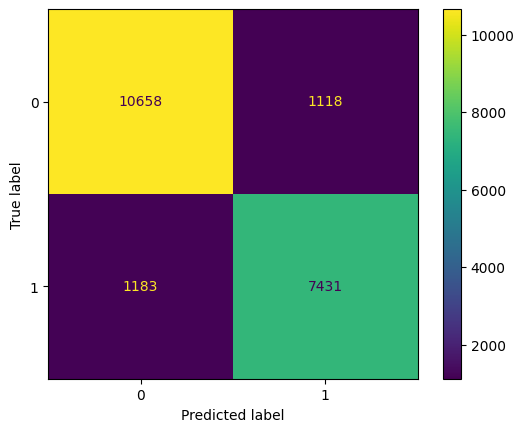

In [10]:
# Analyzing accuracy, recall, precision, f1-score, and confusion matrix
log_acc = metrics.accuracy_score(Y_test, log_predict)
print("Accuracy: %.3f" % log_acc)

log_prec = metrics.precision_score(Y_test, log_predict)
print("Precision: %.3f" % log_prec)

log_rec = metrics.recall_score(Y_test, log_predict)
print("Recall: %.3f" % log_rec)

log_f1 = metrics.f1_score(Y_test, log_predict)
print("F1 Score: %.3f" % log_f1)

log_cm = metrics.confusion_matrix(Y_test, log_predict)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm)
log_disp.plot()
plt.show()

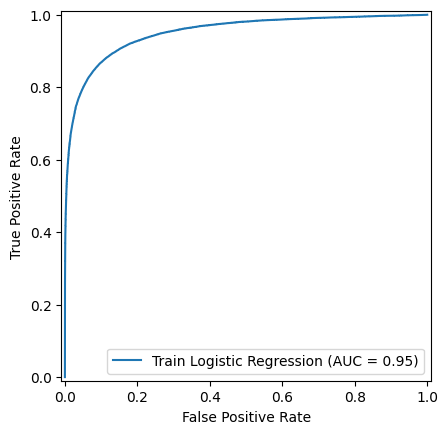

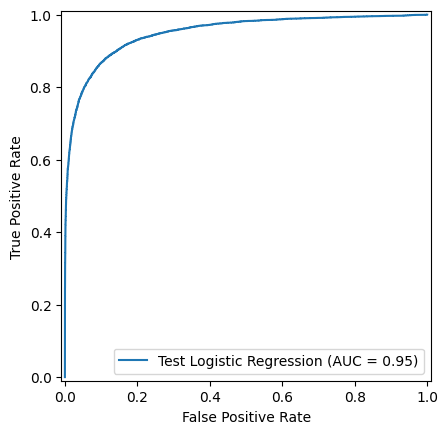

In [11]:
# ROC Curve and AUC Values for Log model (both test and train)
train_log_pred_prob = best_log.predict_proba(X_train)[:,1]
train_log_fpr, train_log_tpr, train_log_thresh = metrics.roc_curve(Y_train, train_log_pred_prob)
train_log_auc = metrics.auc(train_log_fpr, train_log_tpr)
train_log_roc = metrics.RocCurveDisplay(fpr = train_log_fpr, tpr = train_log_tpr, roc_auc = train_log_auc,
                            estimator_name='Train Logistic Regression')
train_log_roc.plot()
plt.show()

test_log_pred_prob = best_log.predict_proba(X_test)[:,1]
test_log_fpr, test_log_tpr, test_log_thresh = metrics.roc_curve(Y_test, test_log_pred_prob)
test_log_auc = metrics.auc(test_log_fpr, test_log_tpr)
test_log_roc = metrics.RocCurveDisplay(fpr = test_log_fpr, tpr = test_log_tpr, roc_auc = test_log_auc,
                            estimator_name='Test Logistic Regression')
test_log_roc.plot()
plt.show()

### **Part B: Gradient Boosting Classifier**

In [12]:
gbc_model = GradientBoostingClassifier()

# Using GridSearchCV for finding optimal params
param_grid = {'loss': ['log_loss', 'exponential'],
              'learning_rate': [.001, .01, .1],
              'n_estimators': [10, 100]}

gbc_grid = GridSearchCV(gbc_model, param_grid)
gbc_grid.fit(X_train, Y_train)

print(gbc_grid.best_params_)
best_gbc = gbc_grid.best_estimator_

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [13]:
# Fitting model
best_gbc.fit(X_train, Y_train)
gbc_predict = best_gbc.predict(X_test)

Accuracy: 0.942
Precision: 0.937
Recall: 0.924
F1 Score: 0.931


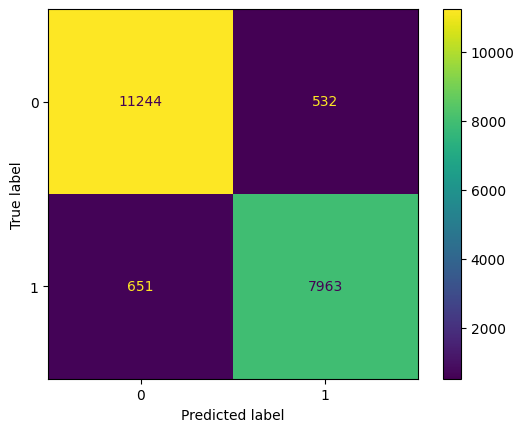

In [15]:
# Analyzing accuracy, recall, precision, f1-score, and confusion matrix
gbc_acc = metrics.accuracy_score(Y_test, gbc_predict)
print("Accuracy: %.3f" % gbc_acc)

gbc_prec = metrics.precision_score(Y_test, gbc_predict)
print("Precision: %.3f" % gbc_prec)

gbc_rec = metrics.recall_score(Y_test, gbc_predict)
print("Recall: %.3f" % gbc_rec)

gbc_f1 = metrics.f1_score(Y_test, gbc_predict)
print("F1 Score: %.3f" % gbc_f1)

gbc_cm = metrics.confusion_matrix(Y_test, gbc_predict)
gbc_disp = ConfusionMatrixDisplay(confusion_matrix = gbc_cm)
gbc_disp.plot()
plt.show()

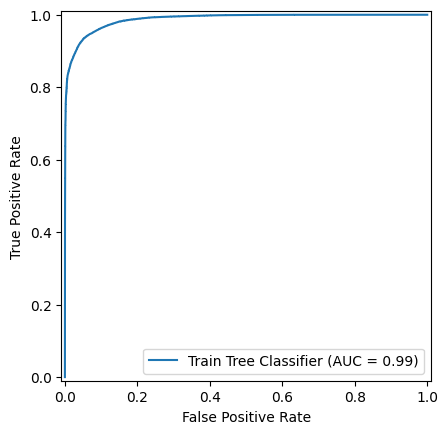

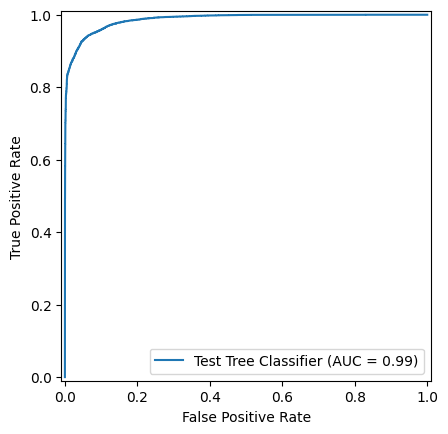

In [16]:
# ROC Curve and AUC Values for GBC model (both test and train)
train_gbc_pred_prob = best_gbc.predict_proba(X_train)[:,1]
train_gbc_fpr, train_gbc_tpr, train_gbc_thresh = metrics.roc_curve(Y_train, train_gbc_pred_prob)
train_gbc_auc = metrics.auc(train_gbc_fpr, train_gbc_tpr)
train_gbc_roc = metrics.RocCurveDisplay(fpr = train_gbc_fpr, tpr = train_gbc_tpr, roc_auc = train_gbc_auc,
                            estimator_name='Train Tree Classifier')
train_gbc_roc.plot()
plt.show()

test_gbc_pred_prob = best_gbc.predict_proba(X_test)[:,1]
test_gbc_fpr, test_gbc_tpr, test_gbc_thresh = metrics.roc_curve(Y_test, test_gbc_pred_prob)
test_gbc_auc = metrics.auc(test_gbc_fpr, test_gbc_tpr)
test_gbc_roc = metrics.RocCurveDisplay(fpr = test_gbc_fpr, tpr = test_gbc_tpr, roc_auc = test_gbc_auc,
                            estimator_name='Test Tree Classifier')
test_gbc_roc.plot()
plt.show()